In [210]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from scipy import interpolate
import pandas as pd

In [211]:
datos = []

for i in range(6):
    datos.append([])
    for j in range(7):
        datos[i].append(np.mean(pd.read_csv('Datos/'+str(i)+'-'+str(j)+'/Raw Data.csv')['Absolute field (µT)']))

In [212]:
imagen = np.zeros((61,73))
imagen.fill(np.nan)

for i in range(6):
    for j in range(7):
        imagen[i*12][j*12] = datos[i][j]

In [213]:
x = [i*12 for i in range (7)]
y = [i*12 for i in range (6)]

f = interpolate.interp2d(x, y, datos, kind = 'cubic', fill_value = 0)

In [214]:
for i in range(61):
    for j in range(73):
        if np.isnan(imagen[i][j]):
            imagen[i][j] = f(j, i)

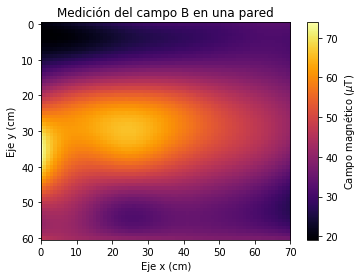

In [215]:
plt.imshow(imagen, cmap = "inferno")
cbar = plt.colorbar()
cbar.set_label("Campo magnético ($\mu$T)")
plt.xlim(0,70)
plt.xlabel("Eje x (cm)")
plt.ylabel("Eje y (cm)")
plt.title("Medición del campo B en una pared")
plt.show()

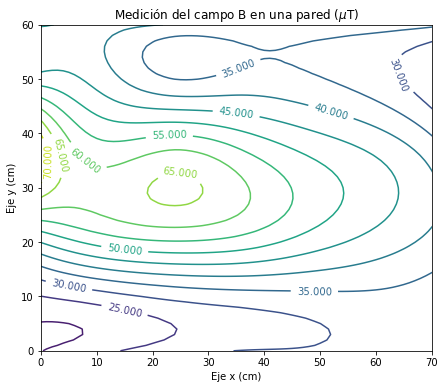

In [216]:
figure= plt.figure(figsize = (7, 6))

ax = plt.contour([x for x in range(73)], [y for y in range(61)], imagen, levels = 10)
plt.clabel(ax, fontsize = 10)

plt.xlim(0,70)
plt.xlabel("Eje x (cm)")
plt.ylabel("Eje y (cm)")
plt.title("Medición del campo B en una pared ($\mu$T)")
plt.show()

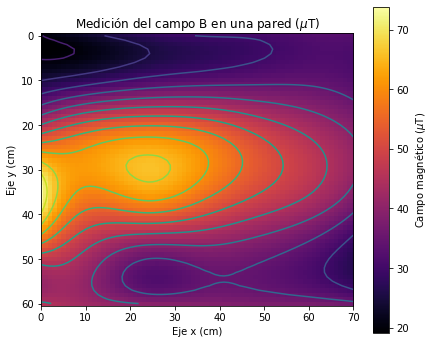

In [217]:
figure= plt.figure(figsize = (7, 6))

ax = plt.contour([x for x in range(73)], [y for y in range(61)], imagen, levels = 10)
ax = plt.imshow(imagen, cmap = "inferno")
cbar = plt.colorbar()
cbar.set_label("Campo magnético ($\mu$T)")

plt.xlim(0,70)
plt.xlabel("Eje x (cm)")
plt.ylabel("Eje y (cm)")
plt.title("Medición del campo B en una pared ($\mu$T)")
plt.show()